# Import Modules

In [2]:
# data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Prep Data

In [3]:
# import dataframes
filepath = '../data/data-case.xlsx'
df_users = pd.read_excel(filepath, sheet_name='users')
df_nps = pd.read_excel(filepath, sheet_name='nps')
df_appts = pd.read_excel(filepath, sheet_name='appointments')

# visualize datafram3es
df_users.head()
# df_nps.head()
# df_appts.head()

,user_id,gender,birth_date,start_date,end_date,city_code
0,1,female,1981-07-07,2010-06-29,2010-11-02,3
1,2,male,1996-10-08,2011-01-18,2012-02-18,1
2,3,female,1986-06-03,2010-01-13,2010-09-12,3
3,4,male,1992-07-28,2010-11-19,2012-08-01,3
4,5,male,1981-04-21,2011-08-27,2011-12-11,2


In [4]:
# compute number of days as a client, end date inclusive
df_users['num_days'] = df_users['end_date'] - df_users['start_date']
df_users['num_days'] = df_users['num_days'].dt.days
df_users.tail()

,user_id,gender,birth_date,start_date,end_date,city_code,num_days
458,459,male,1994-09-26,2010-09-08,2011-08-28,3,354
459,460,male,1986-05-04,2011-08-17,2013-05-08,4,630
460,461,male,1996-01-29,2011-06-18,2012-01-29,3,225
461,462,male,1984-03-27,2011-01-14,2013-06-29,3,897
462,463,female,1995-12-31,2010-09-05,2011-03-26,3,202


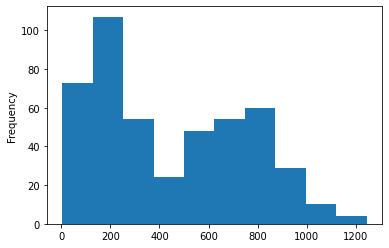

In [5]:
# Visualize distribution of days spent in the platform
plt.figure();
ax = df_users['num_days'].plot.hist()

# Average time between appts

In [6]:
df = df_appts.copy()
df['time_diff'] = 0 #initialize column to assign running time diff.

# sort
df.sort_values(by = ['user_id', 'appointment_date'])

# compute differences
for i in range(df.shape[0] - 1):
    df['time_diff'][i+1] = (df['appointment_date'][i+1] - df['appointment_date'][i]).days
    
# drop negatives
df.loc[df.time_diff < 0, "time_diff"] = 0

df.head()

/Users/Georgia/Desktop/case-cuidas/.env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,appt_id,user_id,appointment_date,channel,type,time_diff
0,1,1,2010-08-10,chat,first,0
1,2,1,2010-10-29,chat,regular,80
2,3,2,2011-06-18,presential,first,232
3,4,2,2011-10-24,chat,regular,128
4,5,2,2011-12-29,chat,regular,66


In [7]:
# compute number of appts
df2 = df_appts.copy()
df2 = df2.groupby('user_id', as_index=False).count()
df2 = df2.drop(columns=['appt_id', 'appointment_date', 'channel'])
df2 = df2.rename(columns={"type": "num_appts"})
df2

,user_id,num_appts
0,1,2
1,2,7
2,3,4
3,4,8
4,5,1
...,...,...
458,459,5
459,460,8
460,461,4
461,462,11


In [8]:
# sum total days
df = df.groupby('user_id').sum()
df = df.drop(columns=['appt_id'])
df = df.reset_index()
df

,user_id,time_diff
0,1,80
1,2,476
2,3,81
3,4,1447
4,5,0
...,...,...
458,459,245
459,460,1793
460,461,144
461,462,2277


In [9]:
df3 = df.copy()
df3['num_appts'] = df2['num_appts']
df3

,user_id,time_diff,num_appts
0,1,80,2
1,2,476,7
2,3,81,4
3,4,1447,8
4,5,0,1
...,...,...,...
458,459,245,5
459,460,1793,8
460,461,144,4
461,462,2277,11


In [10]:
df3['avg_time'] = df3['time_diff']/df3['num_appts']
df3['num_days'] = df_users['num_days']
df3

,user_id,time_diff,num_appts,avg_time,num_days
0,1,80,2,40.000,126
1,2,476,7,68.000,396
2,3,81,4,20.250,242
3,4,1447,8,180.875,621
4,5,0,1,0.000,106
...,...,...,...,...,...
458,459,245,5,49.000,354
459,460,1793,8,224.125,630
460,461,144,4,36.000,225
461,462,2277,11,207.000,897


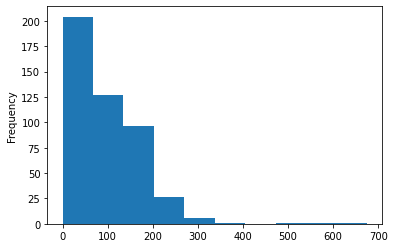

In [11]:
ax = df3['avg_time'].plot.hist()

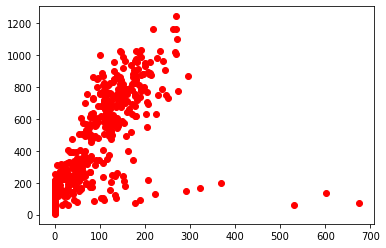

In [13]:
# plot x = avg time vs y = num days
ax = plt.plot(df3['avg_time'], df3['num_days'], 'ro')

In [19]:
from statsmodels.formula.api import ols

model = ols('num_days ~ avg_time', data=df3)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     308.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.05e-53
Time:                        04:50:14   Log-Likelihood:                -3183.7
No. Observations:                 463   AIC:                             6371.
Df Residuals:                     461   BIC:                             6380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    241.4328     16.075     15.019      0.000     209.843     273.023
avg_time       2.2470      0.128     17.563      0.000       1.996       2.498
==============================================================================
Omnibus:                      231.539   Durbin-Watson:                   2.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2509.473
Skew:                          -1.891   Prob(JB):                         0.00
Kurtosis:                      13.760   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""